<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 3*

---

# Preprocessing

## 🏆 학습목표
1. 사용하고자 하는 모델의 특징을 확인하고 특징별로 요구되는 전처리의 특성이 다름을 이해한다.
2. 결측치를 처리하는 여러 방법들을 이해하고 사용하고자 하는 모델의 특성에 맞게 적용한다.
3. 수치형 변수의 여러 전처리 방법들을 이해하고 사용하고자 하는 모델의 특성에 맞게 적용한다.
4. 범주형 변수의 여러 전처리 방법들을 이해하고 사용하고자 하는 모델의 특성에 맞게 적용한다.

## Warm up

### 수치형 변수의 여러 Normalization 기법들을 확인해 보세요.
- [Data Preparation and Feature Engineering for Machine Learning
](https://developers.google.com/machine-learning/data-prep/transform/normalization)



### 📚 아래 라이브러리를 설치해 주세요.

#### 이번 모듈에서 추가적으로 사용하는 라이브러리는 다음과 같습니다. 설치를 확인해 주세요.
- [**category_encoders**](https://contrib.scikit-learn.org/category_encoders/)

In [ ]:
!pip3 install category_encoders

# 1. 모델의 특성과 전처리의 관계
- 지금까지 우리는 특성들과 예측하고자 하는 타겟 간의 각기 다른 관계를 가정하는 여러 모델들의 원리를 배웠습니다. 
- 우리가 배운 모델들은 작동 원리가 다를 뿐만 아니라, 요구하는 전처리의 양식도 다릅니다.
- 각기 다른 모델 유형이 요구하는 전처리의 특성에 대해 알아봅시다.

## Linear / Logistic Regression
- 선형 회귀 모델과 로지스틱 회귀 모델 등, 수치 간의 곱셈이나 덧셈 등의 연산으로 예측이 이루어지는 방법들의 경우 아래의 특징을 갖습니다.

### 1. 입력 특성들의 크기 / 범위 / 분포에 영향을 받습니다.
- 위의 모델들은 입력되는 값 자체가 직접 대수적 연산에 사용되기 때문에, 입력되는 값들의 대소관계 뿐만 아니라 값의 분포나 크기, 범위 자체도 모델의 성능에 직접적인 영향을 줍니다.
- 따라서, 입력 특성들을 뒤에서 설명할 여러 변환 방법(표준화, scaling 등)을 시도하여 모델의 성능이 가장 높은 분포와 범위로 바꾸어 주어야 합니다.
- 이 부분은 뒤에서 설명할 트리 기반 모델과의 가장 큰 차이점입니다. 트리 기반 모델에 관한 설명과 비교하며 다시 한번 살펴보세요.

### 2. 결측치를 반드시 채워야 합니다.
- $ y = 0.4 + nan * 0.3 * 1 * 0.5$ 같은 식이 계산이 가능할 리 없지요.
- 위의 모델들은 수치 간의 대수적 연산으로 학습 및 예측이 이루어지므로, 정상적인 수치형 값이 아닌 값들이 하나라도 포함되어 있으면 학습 및 예측이 이루어지지 않습니다. 
- 따라서 모든 값들을 수치형이고 결측치가 아닌 값들로 바꾸어 주어야 합니다.

### 3. 비선형적 특성이나 특성 간 상호작용 등을 미리 처리해 주어야 합니다.
- 위의 모델들은 입력되는 각 특성이 독립적으로 타겟(또는 로짓)과 선형적으로 관련이 있다고 가정합니다.
- 따라서, 선형적이지 않을 것으로 예상되는 특성들에 대해서는 미리 선형 관계를 갖도록 값들을 변환해 주어야 합니다.
    - 예를 들어, 어떤 특성의 log값 또는 sqrt 값이 예측하는 타겟 특성과 선형일 것으로 예상되는 경우, 해당 특성에 log 또는 sqrt를 씌우는 전처리가 필요합니다.
- 아래 예시를 통해 이해해 봅시다.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(2023)

# 세 특성 a, b, c가 있다고 합시다.
a = np.random.normal(3, 1, size=1000)
b = np.random.normal(4, 2, size=1000)
c = np.random.uniform(low=1, high=10, size=1000)

# 예측하고자 하는 타겟은
#   * a, b 각 특성과는 선형 관계가 아니지만, a*b 특성과는 선형 관계를 이룬다고 합시다.
#   * c 특성과는 선형 관계가 아니지만, 1/c 특성과는 선형 관계를 이룬다고 합시다.
#   * (y = 5ab + 12/c + 7)
y = (5 * a * b) + (12 / c) + 7 + np.random.normal(0, 0.1, size=1000)

# 선형 회귀 모델을 사용해 y값을 예측해 봅시다.
model = LinearRegression()

print("### 1. a, b, c 특성을 그대로 사용하여 모델을 학습해 봅시다.")
X = np.stack([a, b, c], axis=-1)
print("- X, y:", X.shape, y.shape)
model.fit(X, y)
print("- a, b, c 특성을 그대로 입력했을 때 Train Score:\n\t", model.score(X, y))
print(
    f"- 예측된 회귀식:\n\t y = {model.intercept_:.3f} + {model.coef_[0]:.3f}a + {model.coef_[1]:.3f}b + {model.coef_[2]:.3f}c\n\n"
)


print("### 2. a*b 특성을 새로 만들어 모델을 학습해 봅시다.")
X = np.stack([a * b, c], axis=-1)
print("- X, y:", X.shape, y.shape)
model.fit(X, y)
print("- a*b, c 특성을 입력했을 때 Train Score:\n\t", model.score(X, y))
print(
    f"- 예측된 회귀식:\n\t y = {model.intercept_:.3f} + {model.coef_[0]:.3f}ab + {model.coef_[1]:.3f}c\n\n"
)


print("### 3. a*b 특성과 1/c 특성을 새로 만들어 모델을 학습해 봅시다.")
X = np.stack([a * b, 1 / c], axis=-1)
print("- X, y:", X.shape, y.shape)
model.fit(X, y)
print("- a*b, 1/c 특성을 입력했을 때 Train Score:\n\t", model.score(X, y))
print(
    f"- 예측된 회귀식:\n\t y = {model.intercept_:.3f} + {model.coef_[0]:.3f}ab + {model.coef_[1]:.3f}/c"
)

### 1. a, b, c 특성을 그대로 사용하여 모델을 학습해 봅시다.
- X, y: (1000, 3) (1000,)
- a, b, c 특성을 그대로 입력했을 때 Train Score:
	 0.9258401508248733
- 예측된 회귀식:
	 y = -46.423 + 20.004a + 14.826b + -0.574c


### 2. a*b 특성을 새로 만들어 모델을 학습해 봅시다.
- X, y: (1000, 2) (1000,)
- a*b, c 특성을 입력했을 때 Train Score:
	 0.9987932382124811
- 예측된 회귀식:
	 y = 14.343 + 4.990ab + -0.750c


### 3. a*b 특성과 1/c 특성을 새로 만들어 모델을 학습해 봅시다.
- X, y: (1000, 2) (1000,)
- a*b, 1/c 특성을 입력했을 때 Train Score:
	 0.9999922584117673
- 예측된 회귀식:
	 y = 6.998 + 5.000ab + 12.009/c


## Tree Based Models
- Decision Tree, RandomForest, GBDT 등의 결정트리 기반 모델은 아래의 특징을 갖습니다.

### 1. 입력 특성들의 크기 / 범위 / 분포에 영향을 받지 않습니다.
- 트리 기반 모델은 매 단계마다 특정 특성의 cut-line을 정해주는 것으로 학습이 이루어지고, 예측 시에도 cut-line에 따라서 데이터를 분기해 주는 것이 전부입니다.
- 따라서 트리 기반 모델은 입력 특성들의 값이나 분포에 영향을 받지 않으며, 대소관계에만 영향을 받습니다.
- 트리 기반 모델에서 수치의 대소 관계에 영향을 주지 않는 어떠한 전처리 과정도 트리 모델의 성능에 전혀 영향을 주지 않습니다.

### 2. 결측치를 반드시 채울 필요는 없습니다.
- 라이브러리의 구현에 따라 다르지만, 기본적으로 트리 기반 모델은 결측치를 결측 상태 그대로 처리할 수 있습니다.
  - (특성 < 0.5 또는 결측치) <-> (특성 > 0.5) 등의 분기 방식으로 결측치 집단을 하나의 집단으로 분기할 수 있기 때문입니다.
  - (`xgboost`에서는 이 방법을 default로 지원합니다. `sklearn`에서는 결측치를 모델 내에서 자체적으로 처리하는 방법을 지원하지 않습니다.)
- 또한 위 1번 특성과 비슷한 의미로, 결측치를 -10000과 같이 비현실적인 값으로 채워주더라도 모델이 잘 작동합니다.

### 3. 특성과 타겟 간의 비선형적 관계나 특성 간 상호작용이 자동으로 반영될 수 있습니다.
- 트리 기반 모델은 특성과 타겟 간의 선형적 관계를 가정하지 않습니다. 그래서 굳이 특정 관계를 가정한 전처리를 해 주지 않아도 여러 형태의 관계를 유연하게 모델링할 수 있습니다.
- 또한 트리 모델이 여러 번 분기해 내려가는 과정에서, 각 특성들 간의 상호작용이 자동으로 반영됩니다.
  - 예를 들어, (열이 38도 이상**이고** 밀접접촉자가 있**는**) 데이터의 경우만 코로나 확진으로 분류하는 모델도 만들 수 있습니다.

# 2. 결측치를 처리하는 방법들
- 데이터에서 결측치는 다양한 이유로 발생할 수 있습니다.
  1. 조건부로 존재하는 특성의 경우 특정 조건에서 결측치가 발생할 수 있습니다.
     - 예를 들어, 특정 성별에게만 해당되는 건강 정보의 경우 타 성별에 대해서는 결측치로 남아있게 됩니다.
     - 이 유형의 결측치의 경우 간단한 데이터 분석 과정에서 분석가가 쉽게 확인할 수 있습니다.
  2. 설문조사 등의 데이터의 경우, 응답자가 응답을 원하지 않아 임의로 비워둔 경우 결측치가 됩니다.
     - 이런 유형의 결측치는 결측치 자체가 주는 시그널을 확인할 필요도 있습니다.
  3. 데이터를 다운로드, 가공, 정제하는 과정에서 엔지니어의 실수로 생기는 경우도 있습니다!

- 많은 분석에서 결측치가 3번과 같은 경우로 취급됩니다. 하지만 데이터가 많지 않거나 더 세세한 패턴을 파악하고자 할 경우 2번과 같은 경우로 간주하고 결측치를 채우는 전략도 필요합니다.


## 결측치를 그대로 두기
- 위의 설명과 같이, 어떤 상황에는 특정 값이 결측되었다는 사실 자체가 어떤 정보를 줄 수 있습니다. 이런 경우 결측치를 별도 처리하지 않는 것이 하나의 방법이 될 수 있습니다.
  - 건강 관련 설문 등에서, 체중이 건강 범위에서 벗어나는 사람일수록 체중 관련 질문에 응답하지 않을 가능성이 높습니다.
  - 경제력 등 개인의 내밀하고 개인적인 이슈에 대한 응답의 경우 결측치가 주는 정보가 많을 수 있습니다.

- 선형 회귀나 로지스틱 회귀와 같이 대수적 연산으로 구성되는 모델들의 경우 이 방법이 불가능합니다. 대수적 연산을 위해 모든 값들이 정상적인 수치형 값들로 변환되어 있어야 하기 때문입니다.
  - 대신, 특정 특성이 결측이었는지의 여부를 `was_missing` 등의 이름을 갖는 Boolean 특성으로 만들어 다룰 수는 있습니다.
- 트리 기반 모델은 기본적으로 결측치를 핸들링할 필요가 없습니다.
  - `xgboost`와 같은 일부 트리 기반 모델 구현 라이브러리의 경우 결측치를 따로 처리해 주지 않아도 자동으로 결측치를 처리해 줍니다. 매번 분기 시, 결측치에 대해 따로 분기를 진행하도록 구성되어 있습니다.
  - `sklearn` 등의 라이브러리에서는 위 기능이 구현되어 있지 않습니다. 하지만, 결측치 값을 기존 값 범위에 비해 굉장히 크거나 작은 값으로 채워 넣음으로써 결측치를 위와 유사하게 다룰 수 있습니다.

## 단일 대표값으로 채우기
- 흔히 사용하는 방법으로, 각 데이터의 결측치가 해당 데이터의 다른 특성들과 전혀 무관하게 랜덤으로 발생했다는 가정이 있습니다.
- 데이터가 충분히 크거나 데이터 크기에 비해 결측치가 많지 않을 때(~10% 내외) 가장 쉬운 선택지로 사용할 수 있습니다.
- `sklearn`의 `SimpleImputer`가 다양한 단일 대표값 채우기 옵션을 제공합니다. `SimpleImputer`의 `strategy` 파라미터를 `mean`, `median`, `most_frequent`, `constant` 중 하나로 선택할 수 있습니다.


In [ ]:
from sklearn.impute import SimpleImputer

X1 = [[1.0, 10.0, 5.0], [3.0, 12.0, np.nan], [np.nan, 17.0, 6.0], [np.nan, np.nan, 8]]

imputer = SimpleImputer(strategy="median")
imputer.fit_transform(X1)

array([[ 1., 10.,  5.],
       [ 3., 12.,  6.],
       [ 2., 17.,  6.],
       [ 2., 12.,  8.]])

In [ ]:
X2 = [["Seoul", 0.4, 5], ["Seoul", 0.2, 7], ["Busan", np.nan, 6], [np.nan, 0.4, 8]]

imputer = SimpleImputer(strategy="most_frequent")
imputer.fit_transform(X2)

array([['Seoul', 0.4, 5],
       ['Seoul', 0.2, 7],
       ['Busan', 0.4, 6],
       ['Seoul', 0.4, 8]], dtype=object)

## 다른 특성들로부터 조건부로 채우기

- 미리 알고 있는 특성 간 상관관계 정보 또는 데이터로부터 파악한 정보를 기반으로 결측치를 조건부로 채울 수 있습니다.
- 예를 들어, 성별, 키, 몸무게로 구성된 데이터셋에서 키의 결측치를 해당 성별의 평균치로 채우거나, 몸무게의 결측치를 해당 성별과 유사한 키를 갖는 사람들의 평균 몸무게로 채울 수 있습니다.
- 데이터가 부족할수록 결측치가 있는 데이터를 날리지 않는 것이 중요해집니다. 이럴 때 데이터 자체 또는 데이터 설명서를 꼼꼼히 파악하여, 특정 특성에서의 결측의 발생이 다른 특성과 영향을 주고받지는 않는지 면밀한 검토가 필요합니다.

In [ ]:
import pandas as pd

data = {
    "gender": [
        "male",
        "female",
        "male",
        "female",
        "male",
        "male",
        "female",
        "female",
        "female",
        "male",
    ],
    "height": [
        np.nan,
        166.22,
        176.41,
        np.nan,
        179.23,
        168.57,
        170.5,
        162.01,
        146.7,
        165.89,
    ],
    "weight": [68.8, 57.1, np.nan, 62.94, 75.5, 72.7, np.nan, 65.6, 43.8, 75.9],
}

df = pd.DataFrame.from_dict(data)
df

,gender,height,weight
0,male,NaN,68.80
1,female,166.22,57.10
2,male,176.41,NaN
3,female,NaN,62.94
4,male,179.23,75.50
5,male,168.57,72.70
6,female,170.50,NaN
7,female,162.01,65.60
8,female,146.70,43.80
9,male,165.89,75.90


In [ ]:
# height 결측치를 각 성별 키 평균으로 채웠습니다.
male_mean_height = df.query('gender == "male"')["height"].mean()

df.loc[df["gender"] == "male", "height"] = df.loc[
    df["gender"] == "male", "height"
].fillna(male_mean_height)

female_mean_height = df.query('gender == "female"')["height"].mean()

df.loc[df["gender"] == "female", "height"] = df.loc[
    df["gender"] == "female", "height"
].fillna(female_mean_height)
df

,gender,height,weight
0,male,172.5250,68.80
1,female,166.2200,57.10
2,male,176.4100,NaN
3,female,161.3575,62.94
4,male,179.2300,75.50
5,male,168.5700,72.70
6,female,170.5000,NaN
7,female,162.0100,65.60
8,female,146.7000,43.80
9,male,165.8900,75.90


In [ ]:
# 각 성별별로 키에 따라 정렬한 후, 몸무게를 인접한 키를 갖는 사람의 몸무게로 채웁니다. 
# 이후 가장 첫 / 마지막 결측치를 ffill과 bfill로 채웁니다.
# bfill로 할 경우 결측값을 바로 아래 값과 동일하게 변경합니다.
# ffill로 할 경우 결측값을 바로 위 값과 동일하게 변경합니다

df = df.sort_values(by="height").reset_index(drop=True)

df.loc[df["gender"] == "male", "weight"] = (
    df.loc[df["gender"] == "male", "weight"]
    .interpolate(method="nearest")
    .ffill()
    .bfill()
)
df.loc[df["gender"] == "female", "weight"] = (
    df.loc[df["gender"] == "female", "weight"]
    .interpolate(method="nearest")
    .ffill()
    .bfill()
)
df

,gender,height,weight
0,female,146.7000,43.80
1,female,161.3575,62.94
2,female,162.0100,65.60
3,male,165.8900,75.90
4,female,166.2200,57.10
5,male,168.5700,72.70
6,female,170.5000,57.10
7,male,172.5250,68.80
8,male,176.4100,68.80
9,male,179.2300,75.50


# 3. 수치형 변수의 전처리

## 값 분포의 스케일만 변화시키는 변환
- 몇몇 변환 기법들은 수치형 특성 값들의 분포 스케일만 변화시킵니다.

### Min-Max Scaling
- 가장 단순하게 적용할 수 있는 기법으로, 아래와 같은 수식으로 표현됩니다.
  
$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$ 

- 이 기법은 모든 값들을 0과 1 사이의 값으로 스케일링합니다.
- 이 기법은 해당 특성의 **`이상치가 정상치로부터 크게 벗어나지 않는다는 사실을 알 때`**, 또는 특성값들의 분포가 전체 범위에서 균등 분포(Uniform Distribution)를 보일 때 주로 사용합니다.
  - 사람들의 나이 정보 등이 이에 해당합니다.
  - (Classical ML에서는 직접 다루지는 않으나) DL에서 다루는 이미지 데이터의 경우, 이미지의 각 픽셀값들이 0~255의 정수로 표현되기 때문에 이 변환을 주로 사용합니다.
- 간단히 적용할 수 있다는 장점이 있으나, 변환 후 평균이 0이 되지 않고 일부 너무 크거나 작은 이상치의 영향을 크게 받는 문제가 존재합니다.

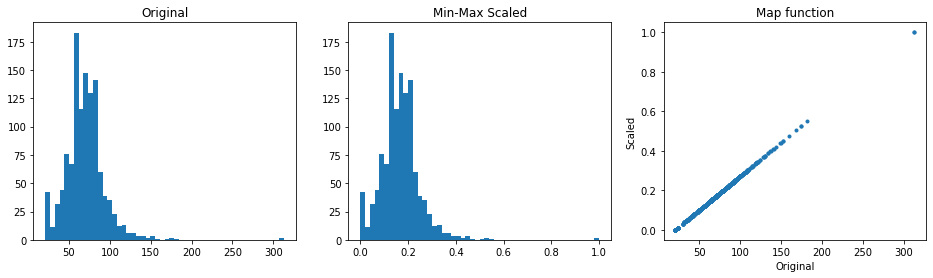

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df = pd.read_csv(
    "https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/house-prices/house_prices_train.csv"
).dropna(subset=["LotFrontage", "LotArea"])

scaler = MinMaxScaler()
df["LotFrontage_min_max_scaled"] = scaler.fit_transform(
    df["LotFrontage"].values.reshape(-1, 1)
)

plt.figure(figsize=(16, 4))
ax1, ax2, ax3 = plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), plt.subplot(1, 3, 3)

ax1.hist(df["LotFrontage"], bins=50)
ax1.title.set_text("Original")

ax2.hist(df["LotFrontage_min_max_scaled"], bins=50)
ax2.title.set_text("Min-Max Scaled")

ax3.plot(df["LotFrontage"], df["LotFrontage_min_max_scaled"], ".")
ax3.xaxis.set_label_text("Original")
ax3.yaxis.set_label_text("Scaled")
ax3.title.set_text("Map function")

### Standardization
- 이 변환 기법은 해당 특성의 평균을 0, 표준편차를 1로 조정해 줍니다.
- 아래와 같은 수식으로 표현됩니다.
  
$$ x' = \frac{x - \mu_{x}}{\sigma_{x}} $$ 

- $\mu_{x}$, $\sigma_{x}$은 각각 특성 $x$값들의 평균과 표준편차입니다.
- 이 기법은 Min-Max Scaling에 비해 이상치에 덜 민감하므로, 해당 특성의 이상치 분포를 정확히 파악하기 어려울 때 (또는 파악하기 이전에) 수치형 특성 변환의 첫 시도로 주로 사용합니다.
- *note) 이 변환은 값들을 평행이동 및 크기 조정하여 평균과 표준편차만 0과 1로 조정해줄 뿐, 분포 자체를 정규분포의 모양으로 바꿔 주지는 않습니다.*

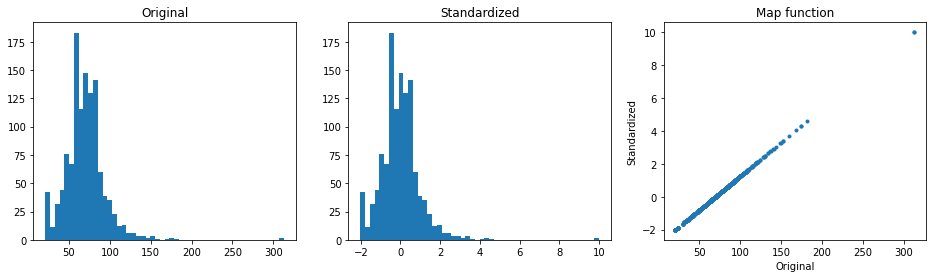

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["LotFrontage_standardized"] = scaler.fit_transform(
    df["LotFrontage"].values.reshape(-1, 1)
)

plt.figure(figsize=(16, 4))
ax1, ax2, ax3 = plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), plt.subplot(1, 3, 3)

ax1.hist(df["LotFrontage"], bins=50)
ax1.title.set_text("Original")

ax2.hist(df["LotFrontage_standardized"], bins=50)
ax2.title.set_text("Standardized")

ax3.plot(df["LotFrontage"], df["LotFrontage_standardized"], ".")
ax3.xaxis.set_label_text("Original")
ax3.yaxis.set_label_text("Standardized")
ax3.title.set_text("Map function")

## 값 분포의 스케일과 형태를 변화시키는 전처리
- 수치형 특성 값들의 분포 스케일뿐만 아니라, 분포의 형태까지도 변화시키는 방법들이 있습니다. 분포의 형태를 변화시킨다는 것은 각 값들 간의 상대적인 거리들까지도 변화시킬 수 있다는 것입니다.

### Clipping
- 이 변환 기법은 특정 범위를 넘어서는 값들을 해당 경계값으로 변환시켜 줍니다.
- 아래와 같은 수식으로 표현됩니다.
  
$$ x' = min(max(x, x_{min}), x_{max}) $$ 

- $x_{min}$, $x_{max}$는 각각 우리가 설정해 주는 경계값들입니다.
- 이 기법은 정상 범위에서 비정상적으로 값이 튀는 **`이상치가 있을 때`** 손쉽게 시도해볼 수 있는 기법입니다.
- *note) 이 변환은 분포 전체의 모양을 변환시키지는 않으며 이상치에만 영향을 줍니다.*

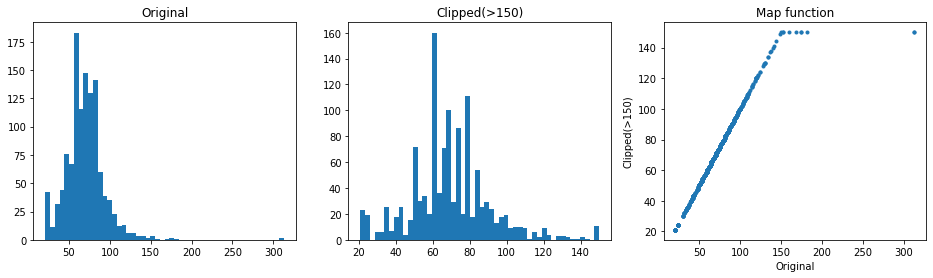

In [ ]:
df["LotFrontage_clipped"] = df["LotFrontage"].clip(lower=0, upper=150)   # lower = min, upper = max

plt.figure(figsize=(16, 4))
ax1, ax2, ax3 = plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), plt.subplot(1, 3, 3)

ax1.hist(df["LotFrontage"], bins=50)
ax1.title.set_text("Original")

ax2.hist(df["LotFrontage_clipped"], bins=50)
ax2.title.set_text("Clipped(>150)")

ax3.plot(df["LotFrontage"], df["LotFrontage_clipped"], ".")
ax3.xaxis.set_label_text("Original")
ax3.yaxis.set_label_text("Clipped(>150)")
ax3.title.set_text("Map function")

### 로그 변환 ($log1p$, $log(1 + x)$ 변환)
- 아래와 같은 수식으로 표현됩니다.
  
$$ x' = log(1+x) $$ 

- 이 기법은 다수의 값들이 굉장히 제한된 범위 내에서만 존재하고 특정 값들이 굉장히 큰 형태의 분포에서 자주 적용됩니다.
- 이러한 분포는 우리 주변에서 쉽게 찾아볼 수 있습니다.
  - 인터넷 기사의 댓글 수 분포: 많은 기사들의 댓글 수가 한 두 개 정도이거나 없습니다. 소수의 기사들만이 많은 댓글을 얻습니다.
  - 경제학에서의 파레토 분포도 위의 조건에 해당합니다.
  - 이러한 분포와 관련해 궁금하다면 `power law`에 대해 알아보세요!
- *note) 이 변환은 `모든 값들이 음이 아닐 때만` 적용할 수 있습니다. 음인 값이 존재할 경우 적절한 값을 더해주어 음이 아닌 값들로 우선 변환해 주어야 적용할 수 있습니다.*

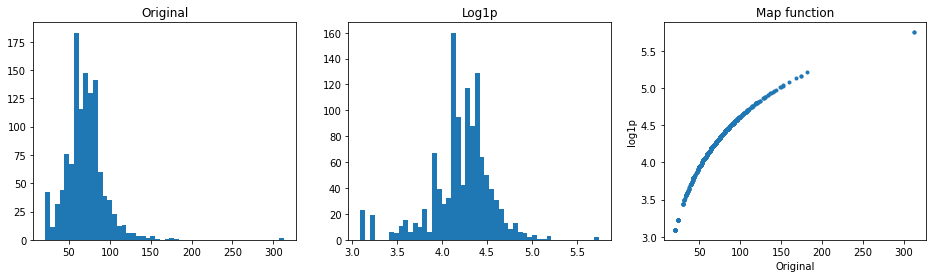

In [ ]:
df["LotFrontage_log1p_ed"] = np.log1p(df["LotFrontage"])

plt.figure(figsize=(16, 4))
ax1, ax2, ax3 = plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), plt.subplot(1, 3, 3)

ax1.hist(df["LotFrontage"], bins=50)
ax1.title.set_text("Original")

ax2.hist(df["LotFrontage_log1p_ed"], bins=50)
ax2.title.set_text("Log1p")

ax3.plot(df["LotFrontage"], df["LotFrontage_log1p_ed"], ".")
ax3.xaxis.set_label_text("Original")
ax3.yaxis.set_label_text("log1p")
ax3.title.set_text("Map function")

### Bucketing
- 이 변환은 다소 특이하게, 수치형 변수를 범주형과 같이 다루는 방법입니다.
  - e.g. 여러 나이를 10대,20대,30대와 같이 다룸
- 각 값들이 속하는 범위를 미리 지정해 주고, 각 값들이 어떤 범위에 속하는지를 숫자로 나타내는 방법입니다.
- 각 값들이 속하는 범위를 지정하는 방법에는 여러 가지가 있습니다.
  - (quantile) 각 범위 내에 동일한 수의 데이터가 들어가도록 범위를 쪼갤 수 있습니다.
  - (uniform) 각 범위를 동일한 간격을 갖도록 쪼갤 수 있습니다.
  - 그 외에도, 기존 사전 지식에 따라 범위를 쪼갤 수 있습니다.
    - 예를 들어 집값 특성을 다룰 때, 부동산 세법 등에 따라 [과세표준](https://www.nts.go.kr/nts/cm/cntnts/cntntsView.do?mi=2357&cntntsId=7739)을 기준으로 집값 범위를 나눌 수 있습니다.
- 특정 특성이 굉장히 중요하나 타겟과 비선형 관계를 가질 것으로 예측될 때, 범위를 지혜롭게 나누어 선형 관계를 갖도록 할 수 있습니다. 또는, one-hot encoding 형태로 변경하여 완전히 범주형 데이터처럼 다룰 수도 있습니다.
- 또한 위 예와 같이 특정 특성에 대한 사전지식이 있을 경우에도 효과적입니다.

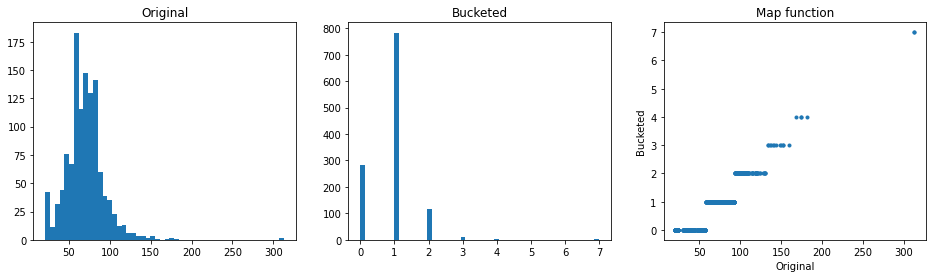

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# strategy = uniform / quantile / kmeans
# encode = ordinal / onehot
kbd = KBinsDiscretizer(n_bins=8, encode="ordinal", strategy="uniform")

df["LotFrontage_8bins"] = kbd.fit_transform(df["LotFrontage"].values.reshape(-1, 1))

plt.figure(figsize=(16, 4))
ax1, ax2, ax3 = plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), plt.subplot(1, 3, 3)

ax1.hist(df["LotFrontage"], bins=50)
ax1.title.set_text("Original")

ax2.hist(df["LotFrontage_8bins"], bins=50)
ax2.title.set_text("Bucketed")

ax3.plot(df["LotFrontage"], df["LotFrontage_8bins"], ".")
ax3.xaxis.set_label_text("Original")
ax3.yaxis.set_label_text("Bucketed")
ax3.title.set_text("Map function")

### Rank 변환
- 이 변환은 값들을 해당 값들의 전체 데이터에서의 순위(혹은 percentile)로 변환합니다.
- 이 기법을 사용하면 값들 간의 거리 정보들이 복구할 수 없는 형태로, `대소 관계만` 남깁니다. 
- 하지만 이상치에 민감하지 않으며 어떠한 분포를 갖는 특성이든 균등 분포(Uniform Distribution)로 변환시켜 준다는 장점 때문에 많이 사용됩니다.

- 모든 데이터를 가지고 있는 경우, `pandas` 라이브러리의 `rank` 기능을 이용하여 간단히 percentile 값을 얻을 수 있습니다(`pct=True`: percentile 반환 / `False`: rank 자체를 반환)
- 위의 방법을 사용하면 기존에 없던 데이터가 들어왔을 때 변환이 불가합니다. 이런 상황에서는 `sklearn`의 `QuantileTransformer` 등을 사용할 수 있습니다.

In [ ]:
df["LotFrontage_rank"] = df["LotFrontage"].rank(pct=True)
df[["LotFrontage", "LotFrontage_rank"]]

,LotFrontage,LotFrontage_rank
0,65.0,0.435054
1,80.0,0.735221
2,68.0,0.483764
3,60.0,0.313072
4,84.0,0.786844
...,...,...
1455,62.0,0.383014
1456,85.0,0.807244
1457,66.0,0.459617
1458,68.0,0.483764


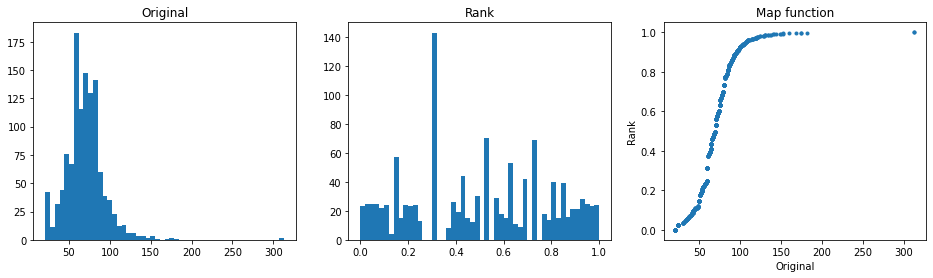

In [ ]:
from sklearn.preprocessing import QuantileTransformer

tfer = QuantileTransformer()

df["LotFrontage_rank"] = tfer.fit_transform(df["LotFrontage"].values.reshape(-1, 1))

plt.figure(figsize=(16, 4))
ax1, ax2, ax3 = plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), plt.subplot(1, 3, 3)

ax1.hist(df["LotFrontage"], bins=50)
ax1.title.set_text("Original")

ax2.hist(df["LotFrontage_rank"], bins=50)
ax2.title.set_text("Rank")

ax3.plot(df["LotFrontage"], df["LotFrontage_rank"], ".")
ax3.xaxis.set_label_text("Original")
ax3.yaxis.set_label_text("Rank")
ax3.title.set_text("Map function")

- Rank 변환의 경우 특성값의 분포에 따라 mapping의 형태가 달라집니다. 하지만 변환된 결과는 결국 균등분포(Uniform Distribution)를 띄게 됩니다.

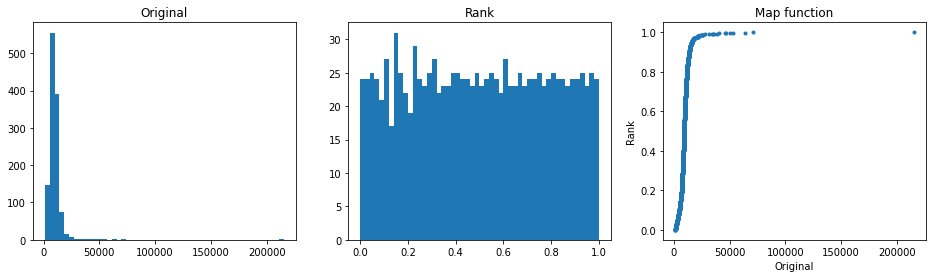

In [ ]:
df["LotArea_rank"] = tfer.fit_transform(df["LotArea"].values.reshape(-1, 1))

plt.figure(figsize=(16, 4))
ax1, ax2, ax3 = plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), plt.subplot(1, 3, 3)

ax1.hist(df["LotArea"], bins=50)
ax1.title.set_text("Original")

ax2.hist(df["LotArea_rank"], bins=50)
ax2.title.set_text("Rank")

ax3.plot(df["LotArea"], df["LotArea_rank"], ".")
ax3.xaxis.set_label_text("Original")
ax3.yaxis.set_label_text("Rank")
ax3.title.set_text("Map function")

### 모델 특성에 따른 수치형 변수 변환의 적용
- 1에서 설명한 바와 같이, 위 모든 변환들은 우리가 배운 선형 / 로지스틱 회귀 모델 등 대수 연산으로 학습 및 예측이 수행되는 모델에서 적용될 경우 결과에 영향이 있습니다.

- 트리 기반 모델에서는 어떨까요?
  - Min-Max Scaling, Standardization, 로그 변환, Rank 변환의 경우 값 간의 대소 관계를 그대로 보존하므로, 모델 학습에서 전혀 영향을 주지 않습니다.
  - Clipping, Bucketing의 경우는 어떤가요?
    - 조금만 더 고민해 보면, Clipping, Bucketing 과정 자체가 트리 기반 모델에서의 분기 과정과 본질적으로 동일하다는 사실을 알 수 있습니다.
    - 트리 기반 모델에서는 각 분할 단계별로 특정 특성이 특정 범위 내에 있으면 동일한 집단으로 간주하기 때문입니다.
    - 따라서, 굳이 위와 같은 전처리를 해 주지 않아도 학습 과정에서 최적의 값 구분 지점들을 모델이 찾아서 패턴을 잘 학습합니다.
    - Clipping의 경우: a1 | A | a2 특정 지점(A)을 기준으로 그 이하(a1), 그 이상(a2)은 어떤 값으로 채워준다.
    - Bucketing의 경우: a|b|c|d|e 어떤 기준을 가지고 수치형 변수를 범주화(a,b,c,d,e) 해준다.
    - 트리기반 모델에서는 수치형특성이 입력특성으로 들어왔을때 불순도를 최소화하는 지점을 찾아 그 지점을 기준으로 분기를 해줌 -> 굳이 clipping, bucketing해줄 필요가 없다.

# 4. 범주형 변수의 전처리
- 범주형 변수는 수치형 변수로 바꿔주는 전처리 과정을 거칩니다(encoding).
- 대표적인 인코딩 기법들은 이미 학습하였으므로, 간단히 정리하고 몇 가지 새로운 기법들을 소개합니다.

In [ ]:
data = {
    "location": [
        "jeju",
        "jeju",
        "seoul",
        "busan",
        "busan",
        "daegu",
        "seoul",
        "jeju",
        "daegu",
        "busan",
        "jeju",
        "jeonju",
    ],
    "room_type": [
        "hotel",
        "hotel",
        "airbnb",
        "guest_house",
        "hotel",
        "airbnb",
        "hotel",
        "guest_house",
        "hotel",
        "airbnb",
        "pansion",
        "hotel",
    ],
    "target": [1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1],
}
df = pd.DataFrame.from_dict(data)

### One-Hot Encoding / Ordinal Encoding
- `One-Hot Encoding`은 각 범주형 특성 값들을 각 값들에 대해 (해당한다/해당하지 않는다)의 1과 0 값으로 인코딩합니다. 
    - 명목형 변수는 One-Hot Encoding 방식을 이용해서 변환해줄 수 있습니다. 
    - 하지만 cardinarlity가 너무 클 경우에는 차원이 너무 커지기 때문에 적절한 인코딩 방법은 아닙니다. 
    - 트리 기반 모델에서는 특성의 정보를 분산시키고 비효율적인 트리를 만들 수 있기 때문에 잘 사용하지 않습니다.
- `Ordinal Encoding`은 각 범주형 특성 값들을 단순히 서로 다른 정수값들로 인코딩합니다. 
    - 순서형 변수는 Ordinal Encoding 방식을 이용해 변환해줄 수 있습니다. 
    - 선형 회귀나 로지스틱 회귀 모델을 사용할 때 명목형 변수를 ordinal encoding을 해주는 것은 적절하지 않습니다. 
        - 각 범주형 데이터가 양적 대소 관계를 갖는 것처럼 간주되기 때문입니다. 
    - 하지만 트리 기반 모델에서는 여러 번의 분기를 통해 이러한 양적 대소 관계가 점차 사라지기 때문에, `One-Hot Encoding`에 비해 효율적이면서 잘 작동합니다.

In [ ]:
from category_encoders import OneHotEncoder, OrdinalEncoder

onehot_encoder = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

one_hot_encoded_location = onehot_encoder.fit_transform(df["location"])
ordinal_encoded_room_type = ordinal_encoder.fit_transform(df["room_type"])

In [ ]:
pd.concat([df["location"], one_hot_encoded_location], axis=1)

,location,location_1,location_2,location_3,location_4,location_5
0,jeju,1,0,0,0,0
1,jeju,1,0,0,0,0
2,seoul,0,1,0,0,0
3,busan,0,0,1,0,0
4,busan,0,0,1,0,0
5,daegu,0,0,0,1,0
6,seoul,0,1,0,0,0
7,jeju,1,0,0,0,0
8,daegu,0,0,0,1,0
9,busan,0,0,1,0,0


In [ ]:
pd.concat([df["room_type"], ordinal_encoded_room_type], axis=1)

,room_type,room_type
0,hotel,1
1,hotel,1
2,airbnb,2
3,guest_house,3
4,hotel,1
5,airbnb,2
6,hotel,1
7,guest_house,3
8,hotel,1
9,airbnb,2


### Count Encoding(Frequency Encoding)
- 어떤 데이터셋에서는 각 카테고리의 등장 빈도가 중요한 정보가 되는 경우가 있습니다.
  - 골동품 등의 가격을 예측할 때, 희귀 카테고리에 속할수록 가격이 올라갈 것이라고 기대해볼 수 있습니다.
- 위와 같은 상황에서는 각 카테고리 값들의 등장 빈도로 범주형 값을 대체합니다.

#### 장점
- 구현이나 해석이 쉬우며, 특성의 차원을 늘리지 않습니다.
- 특성 빈도에 대한 정보를 모델에게 명시적으로 제공할 수 있습니다.

#### 단점
- 동일한 빈도를 갖는 서로 다른 특성값이 구분되지 않습니다.
- 학습이 완료된 후 입력으로 들어오는 새로운 Unknown 특성값에 대해 대응하기 어렵습니다(일반적으로 미리 정해준 값이나 결측치 등으로 인코딩합니다).

In [ ]:
from category_encoders import CountEncoder

count_encoder = CountEncoder(normalize=True)  # normalize=False -> frequency 자체를 반환합니다.
count_encoded_room_type = count_encoder.fit_transform(df["room_type"])

pd.concat([df["room_type"], count_encoded_room_type], axis=1)

,room_type,room_type
0,hotel,0.500000
1,hotel,0.500000
2,airbnb,0.250000
3,guest_house,0.166667
4,hotel,0.500000
5,airbnb,0.250000
6,hotel,0.500000
7,guest_house,0.166667
8,hotel,0.500000
9,airbnb,0.250000


### Target Encoding(Mean Encoding)
- 각 범주형 특성값들을 해당 특성을 갖는 데이터의 타겟값의 평균으로 인코딩하는 방법입니다.

#### 장점
- 해석이 쉬우며, 특성의 차원을 늘리지 않습니다.
- 특성값과 타겟값 간의 직접적인 관계를 모델링하여, 모델에게 중요한 정보를 제공할 수 있습니다.

#### 단점
- 동일한 평균 타겟값을 갖는 서로 다른 특성값이 구분되지 않습니다.
- **과적합 문제가 발생할 수 있습니다.**

In [ ]:
loc_mapping = df.groupby("location")["target"].mean()
print("Mean Target for each Location:\n", loc_mapping, "\n\n")

target_encoded_loc = df["location"].map(loc_mapping)

pd.concat([df["location"], target_encoded_loc], axis=1)

Mean Target for each Location:
 location
busan     0.333333
daegu     0.500000
jeju      0.750000
jeonju    1.000000
seoul     0.500000
Name: target, dtype: float64 




,location,location
0,jeju,0.750000
1,jeju,0.750000
2,seoul,0.500000
3,busan,0.333333
4,busan,0.333333
5,daegu,0.500000
6,seoul,0.500000
7,jeju,0.750000
8,daegu,0.500000
9,busan,0.333333



#### Target Encoding과 과적합
- `Target Encoding`은 과적합에 취약합니다.
  - Target Encoding된 특성의 경우 인코딩된 값만 보더라도 타겟값을 어느 정도 예측할 수 있게 됩니다.
  - 특히, 학습 데이터에 해당 특성값이 충분히 포함되어 있지 않은 경우 값을 misleading하게 됩니다.
- 위 예시에서 `jeonju`의 인코딩 값을 살펴봅시다.
  - `jeonju`는 데이터에 하나밖에 포함되어 있지 않으며, 해당 데이터의 타겟값이 1입니다. 따라서 `jeonju`는 1로 인코딩되었습니다.
  - 위 데이터를 통해 모델을 학습하면, 우리는 모델에게 `jeonju` 지역을 갖는 데이터의 타겟값이 1일 것이라는 강력한 시그널을 주는 셈입니다.
  - 하지만 모든 `jeonju` 데이터의 타겟값이 항상 1일까요? 아닐 것입니다.
- 위와 같은 문제를 해결하기 위해, `Target Encoding`을 구현한 많은 라이브러리에서는 특성별 조건부 타겟 평균값 뿐만 아니라, 해당 특성의 출현 빈도까지 함께 고려하여 범주형 값을 인코딩합니다.

In [ ]:
from category_encoders import TargetEncoder

target_encoder = TargetEncoder()

target_encoded_loc_2 = target_encoder.fit_transform(df["location"], y=df["target"])

# 우리가 직접 구한 encoded value와 category_encoder.TargetEncoder의 encoded_value를 비교해 보세요.
pd.concat([df["location"], target_encoded_loc, target_encoded_loc_2], axis=1)

,location,location,location
0,jeju,0.750000,0.742096
1,jeju,0.750000,0.742096
2,seoul,0.500000,0.522412
3,busan,0.333333,0.363134
4,busan,0.333333,0.363134
5,daegu,0.500000,0.522412
6,seoul,0.500000,0.522412
7,jeju,0.750000,0.742096
8,daegu,0.500000,0.522412
9,busan,0.333333,0.363134


## 👏 마무리
#### 이번 노트에서는 
- 지금까지 배운 모델의 특징과 그에 따른 전처리 방식의 차이를 배웠습니다. 
- 결측치를 처리하는 다양한 방법을 배웠습니다. 
- 수치형 변수를 변환해주는 다양한 방법을 배웠습니다.  
- 범주형 변수를 변환해주는 다양한 방법을 배웠습니다.   
<br></br>

#### 학습 후 아래 질문에 답해보세요.

1. linear/logistic 모델과 tree-based model은 어떤 특징적 차이가 있나요?
2. tree-based model은 전처리가 많이 필요하지 않은 이유가 무엇인가요?
    - tree-based model은 명목형 변수도 ordinal encoder를 사용할 수 있는 이유는 무엇인가요?
3. 값의 분포를 바꾸는 전처리 방식과 바꾸지 않는 전처리 방식에는 무엇이 있나요?


# References

- [Sklearn: Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)
- [Google Machine Learning Crash Course: Data Prep](https://developers.google.com/machine-learning/data-prep)
- [Category Encoders](https://contrib.scikit-learn.org/category_encoders/index.html)
- 데이터가 뛰어노는 AI 놀이터, 캐글 상위 랭킹 진입을 위한 필살기 (가도와키 다이스케, 사카타 류지, 호사카 게이스케, 히라마쓰 유지 저/대니얼WJ )